# INTERPOLAÇÃO E AJUSTE DE CURVAS


Interpolação e ajuste de curvas, são importantes recursos na vida de qualquer pesquisador. A necessidade de encontrar a função que determina um conjunto de dados ou o valor entre dois pontos, é algo bastante comum na vida de um pesquisador. 

Esta capítulo aborda as funções....
* **SymPy.jl**

O pacote `SymPy.jl` é uma biblioteca `Python` para matemática simbólica utilizado na linguagem `Julia` via pacote `PyCall.jl`. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("SymPy")

```

* **Polynomials.jl**

É um pacote exclusivo para manipulação de polinômios. Permite operações de aritmética básica, integração, diferenciação, avaliação e determinação de raizes em polinômios. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("Polynomials")

```

* **Interpolations.jl**

O pacote Calculus fornece ferramentas para trabalhar com as operações básicas de cálculo de diferenciação e integração. Você pode usar o pacote Calculus para produzir derivadas aproximadas por várias formas de diferenciação finita ou para produzir uma derivada exata usando diferenciação simbólica. Você também pode computar integrais definidas por diferentes métodos numéricos. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("Interpolations")
```

* **LsqFit.jl**

O pacote `LsqFit.jl` é uma pequena biblioteca que fornece alguns métodos de mínimos quadrados que podem ser aplicados de forma geral a um grande número de funções. A função `LsqFit()` fornece dados sobre erros, jacobiano da solução e outros . Para instalar o pacote use:
```julia
using Pkg
Pkg.add("LsqFit")
```

Além desses pacotes, o pacote `Base.jl` da linguagem `Julia` dispõe da função `LinReg()` para calcular as constantes de uma função linear.


## INTERPOLAÇÃO

Quando trabalhamos com pesquisa experimental ou simulação numérica, . Dessa forma Chapra e Canale (2008) definem a interpolação como a estimativa de valores entre pontos discretos bem conhecidos. A interpolação serve para determinar a correspondência $x_{interp} -> y_{interp}$ entre dois pontos $A(x_1,y_1)~ e~ B(x_2,y_2)$ conhecidos. 

Os resultados de medições experimentais ou simulações numéricas fornecem, em geral,um conjunto de valores de uma função em pontos discretos de uma variável independente. Esses valores podem ser apresentados naforma de uma tabela para valores discretos de . O processo de calcular a função para valores intermédios aos valores conhecidos de é chamado interpolação.

Dado um conjunto de dados X e Y

In [4]:
x_dados = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y_dados = [0.0, 0.5, 2.3, 5.0, 8.0, 7.0, 6.9, 8.0, 9.0, 6.0, 4.2 ];

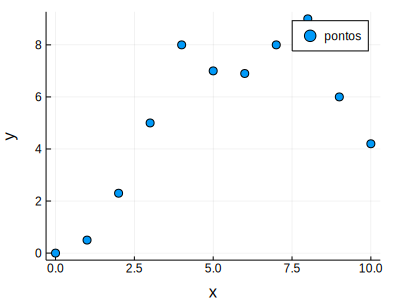

In [5]:
using Plots
gr()

scatter(x_dados, y_dados, 
    size = (400, 300), label = "pontos", 
    xlabel = "x",
    ylabel = "y")

### PACOTE INTERPOLATIONS

A função `interpolate()` do pacote `Interpolations.jl` implementa vários métodos para realizar interpolação entre pontos, são eles:
* **Linear**: 
* **Constant**:
* **Cubic**: 

A função `interpolate()` usa vetores unidimensionais do tipo Array{Tipo_dado,**1**}. Caso use vetor linha(bidimensional), há a necessidade de convertê-lo em unidimensional através da função `vec(dado)`. Sintaxe:
```julia
funcao_interp = interpolate((x_dados,), y_dados, Gridded(Metodo())); 
```
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eito "y";
* **Metodo**: método a ser utilizado (linear, spline..).

Para instalar use: 
```julia
Pkg.add("Interpolations")
```

In [59]:
using Interpolations

In [60]:
y_interp_lin = LinearInterpolation(x_dados, y_dados);

In [61]:
typeof(y_interp_lin);

In [62]:
# testando a função interpolação linear para x_interp = 2.3
y_interp_lin(2.3)

1.0342335371950184

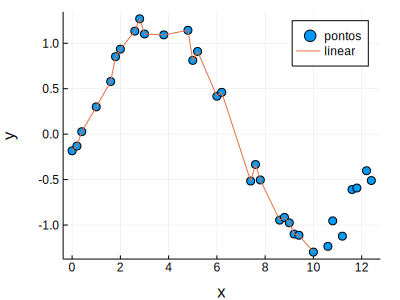

In [63]:
# carregar pacote gráfico
using Plots
gr()

x_interp = 0:0.1:10

scatter(x_dados, y_dados, label = "pontos")
plot!(x_interp, y_interp_lin.(x_interp), 
    size = (400, 300), label = "linear", 
    xlabel = "x",
    ylabel = "y")

* **Cubic spline**

In [64]:
y_interp_cs = CubicSplineInterpolation(0:10, y_dados);

ArgumentError: ArgumentError: The range 0:10 is incommensurate with the corresponding axis Base.OneTo(32)

In [65]:
x_interp = 0:0.1:10
plot(x_interp, y_interp_cs.(x_interp), label = "Cúbica")
scatter!(x_dados, y_dados, size = (400, 300), 
    label = "pontos",
    xlabel = "x",
    ylabel = "y")

UndefVarError: UndefVarError: y_interp_cs not defined

* **Interpolação Constant**

In [66]:
y_interp_con = Interpolations.interpolate((x_dados,), y_dados, Gridded(Constant())); 

In [67]:
# testando a função interpolação linear para x_interp = 2.3
y_interp_con(2.3)

0.935180993484717

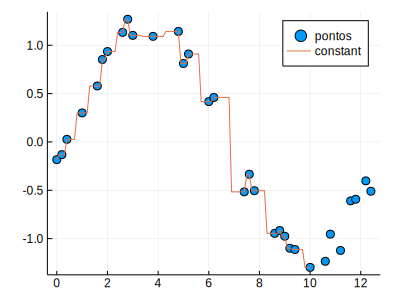

In [68]:
using Plots
gr()

x_interp = 0:0.1:10
scatter(x_dados, y_dados, label = "pontos")
plot!(x_interp, y_interp_con(x_interp), size = (400, 300), label = "constant")

In [69]:
using Plots
gr()

scatter(x_dados, y_dados, label = "pontos")
plot!(x_interp, y_interp_lin.(x_interp), size = (400, 300), label = "Linear")
plot!(x_interp, y_interp_con.(x_interp), size = (400, 300), label = "Constant")
plot!(x_interp, y_interp_cs.(x_interp) , size = (400, 300), label = "Cúbica")

UndefVarError: UndefVarError: y_interp_cs not defined

### PACOTE SYMPY

A função `interpolate()` cria um polinômio interpolador para os pontos de dados em função de uma variável de grau `n = quantidade_de_pontos - 1`. Sintaxe:
```julia
interpolate(x_dados, y_dados, var_interp)
```
Sendo:
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eito "y";
* **var_interp**: variável do polinômio interpolador.

In [70]:
using SymPy, Plots
gr()

Plots.GRBackend()

In [17]:
@syms X

(X,)

In [18]:
Xs = SymPy.interpolate(x_dados, y_dados, X)

                     10                       9                       8       
6.96373456790123e-5⋅X   - 0.0035495205026455⋅X  + 0.0777025462962966⋅X  - 0.95

               7                     6                     5                  
3812003968255⋅X  + 7.18637210648149⋅X  - 34.1673524305556⋅X  + 101.41796682098

   4                     3                     2                     
7⋅X  - 179.039809854497⋅X  + 168.667888888889⋅X  - 62.6854761904762⋅X

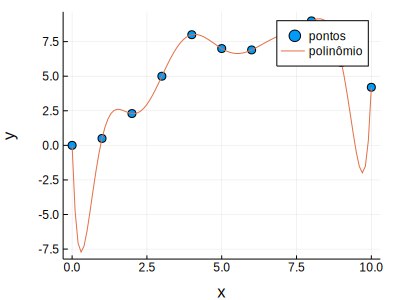

In [19]:
using Plots
gr()

scatter(x_dados, y_dados, size = (400, 300), 
    xlabel = "x", 
    ylabel = "y", 
    label = "pontos")
plot!(0:0.1:10, Xs, label = "polinômio")

### POLYNOMIALS.JL

A função `polyfit()` cria o polinômio interpolador utilizando o ajuste de mínimos quadrados. Sintaxe:

```julia
polyfit(x_dados, y_dados, n)
```
Sendo:
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eito "y";
* **n**: grau do polinômio interpolador. Quando não especificado adota o máximo possível de acordo com a quantidade de dados (n = número de pontos - 1).

In [20]:
using Polynomials

Criaremos dois polinômios, $yp1~$ e $~yp2~$, sendo o primeiro e o segundo de grau 5. 

In [21]:
yp1 = polyfit(x_dados, y_dados)
yp2 = polyfit(x_dados, y_dados, 5);

In [22]:
display(yp1)

Poly(-62.685476215922975*x + 168.66788895995472*x^2 - 179.03980993402183*x^3 + 101.41796686867757*x^4 - 34.16735244766041*x^5 + 7.186372110321928*x^6 - 0.9538120045119778*x^7 + 0.07770254634338764*x^8 - 0.003549520504921198*x^9 + 6.96373457259735e-5*x^10)

In [23]:
display(yp2)

Poly(0.012762237762238237 - 1.800539044289048*x + 2.768436771561757*x^2 - 0.7440632284382199*x^3 + 0.08016462703962557*x^4 - 0.0031249999999999225*x^5)

In [24]:
yp1(0), yp2(0)

(0.0, 0.012762237762238237)

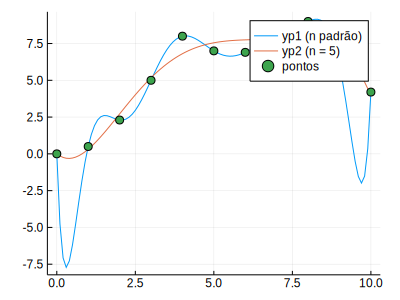

In [25]:
using Plots
gr()

plot(0:0.1:10, yp1(0:0.1:10), label = "yp1 (n padrão)")
plot!(0:0.1:10, yp2(0:0.1:10), label = "yp2 (n = 5)")
scatter!(x_dados, y_dados, label = "pontos", size = (400, 300))

### COMO ESCOLHER O MELHOR PACOTE PARA INTERPOLAÇÃO?

## AJUSTE DE CURVAS

De acordo com Chapra & Canale (2008) "Quando um erro substancial estiver associado aos dados, a interpolação polinomial é inapropriada e pode produzir resultados insatisfatórios quando usada para prever valores intermediários". 

Ajuste de Curvas é um método que consiste em encontrar uma curva que se ajuste a uma série de pontos e que possivelmente cumpra uma série de parâmetros adicionais. Ajuste de curvas pode envolver tanto interpolação, onde é necessário um ajuste exato aos dados, quanto suavização, na qual é construída uma função "suave" que aproximadamente se ajusta aos dados. Outro assunto relacionado é análise de regressão, a qual se foca mais em questões da inferência estatística. O ajuste de curvas é muito utilizado para, a partir de dados conhecidos, fazer-se extrapolações. Conhecida a equação da curva, pode-se determinar valores fora do intervalo conhecido. Fonte: wikipedia.

Pacotes importantes:


### LINEAR SIMPLES

In [80]:
using CSV, DataFrames

In [81]:
tabela_dados_reta = CSV.read("dados_reta.csv")

,x,y
,Float64⍰,Float64⍰
1,0.0,-0.18344
2,0.2,-0.131101
3,0.4,0.0268876
4,0.8,0.110533
5,1.0,0.253945
6,1.2,0.25719
7,1.4,0.531889
8,1.6,0.579048
9,2.0,0.935181


As variáveis "x_dados" e "y_dados" receberão os dados das colunas da tabela de dados e em seguida será plotado o gráfico.

In [82]:
x_dados = float.(tabela_dados_reta[1])
y_dados = float.(tabela_dados_reta[2]);

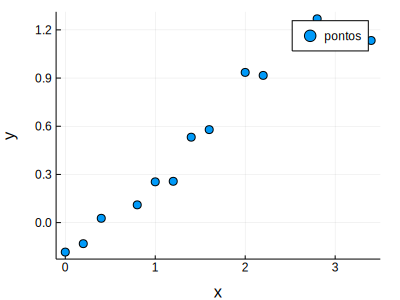

In [83]:
using Plots
gr()

scatter(x_dados, y_dados, size = (400, 300), 
    label = "pontos",
    xlabel = "x",
    ylabel = "y")

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma reta. A função linear utilizada como modelo será na forma:

$ modelo = ax + b $

Sendo:
* **a, b**: os coeficientes do modelo de ajuste.

#### PACOTE LSQFIT

 Sintaxe:
```julia
modelo_ajuste_lsqfit(x, k) = k[1]*x + k[2]
ajuste_dados = curve_fit(modelo_ajuste, x_dados, y_dados, [k_1, k_2])
k = ajuste_dados.param
```
Sendo: 
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";   
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y";
* **modelo_ajuste**: função matemática que mais se aproxima dos dados;
* **k**: vetor das constantes do modelo;
* **k_1 e k_2**: valores iniciais das constantes do modelo.

Parâmetros:
* reta.param: coefientes da curva
* (OPCIONAL) reta.dof: graus de liberdade
* (OPCIONAL) reta.resid: vetor de residuos de erro
* (OPCIONAL) reta.jacobian: Jacobiano Estimado
* (OPCIONAL) estimativa de erro dos coeficientes. 0.95 é 95% de confiança:

 #erros = estimate_errors(reta, 0.95);

In [84]:
using LsqFit

In [85]:
# Vetor "k_LF" determina os coef iniciais da reta 
@. modelo_reta_lsqfit(x, k_LF) = k_LF[1]*x + k_LF[2]

modelo_reta_lsqfit (generic function with 1 method)

In [86]:
# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5]

reta = curve_fit(modelo_reta_lsqfit, x_dados, y_dados, [0.5, 0.5]);

Atualizando o vetor "k_LF". Veja os coeficientes da reta

In [87]:
k_LF = reta.param

2-element Array{Float64,1}:
  0.45996226614943064
 -0.17573217249564999

In [88]:
# testando o modelo de ajuste para x = 0
modelo_reta_lsqfit(0, k_LF)

-0.17573217249564999

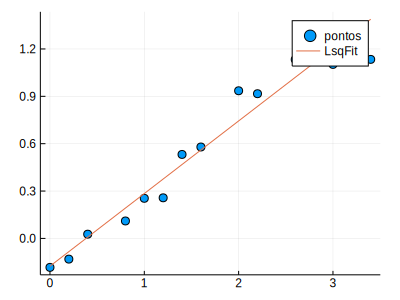

In [89]:
using Plots
gr()

scatter(x_dados , y_dados, label = "pontos")
plot!(x_dados, modelo_reta_lsqfit(x_dados, k_LF), size = (400, 300), label = "LsqFit")

O "modelo" reta, é um polinômio na forma de vetor contendo o valor de a = 0.45996 e b= -0.17573

### POLINOMIAL (grau > 1) ###

In [90]:
using DataFrames

In [91]:
tabela_dados_parabola = CSV.read("dados_parabola.csv");

atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_parabola

In [92]:
x_dados = float.(tabela_dados_parabola[1])
y_dados = float.(tabela_dados_parabola[2]);

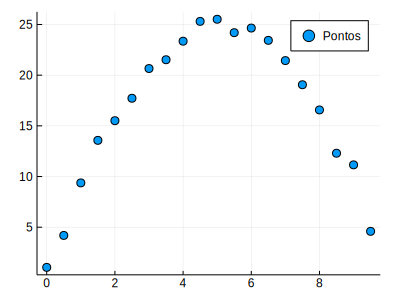

In [93]:
using Plots
gr()

scatter(x_dados , y_dados,  size = (400, 300), label = "Pontos")

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma curva polinomial(parábola). A função polinomial utilizada como modelo será na forma:

$$ modelo = k_1x^2 + k_2x + k_3$$
Sendo: 
* **k_1, k_2 e k_3**: os coeficientes do modelo de ajuste.

#### PACOTE LSQFIT

Sintaxe:
```julia
@. modelo_ajuste_lsqfit(x, k) = k[1]*x^2 + k[1]*x +...+ k[2] 
ajuste_dados = curve_fit(modelo_ajuste, x_dados, y_dados, [k_1,..., k_n])
k = ajuste_dados.param
```
Sendo: 
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";    
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y";
* **modelo_ajuste**: função matemática que mais se aproxima dos dados;
* **k**: vetor das constantes do modelo;
* **k_1, ..., k_n**: valores iniciais das constantes do modelo.

In [94]:
using LsqFit

In [95]:
# Vetor "k_LF" determina os coef iniciais da curva 
# Há a necessidade do " . " antes da potencia
@. modelo_curva_lsqfit(x, k_LF) = k_LF[1]*x.^2 + k_LF[2]*x + k_LF[3]

modelo_curva_lsqfit (generic function with 1 method)

In [96]:
# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5, 0.5]
curva = curve_fit(modelo_curva_lsqfit, float(x_dados), float(y_dados) , [0.5, 0.5, 0.5]);

In [97]:
# atualizando o vetor "a". Veja os coeficientes da curva
k_LF = curva.param

3-element Array{Float64,1}:
 -0.9676935282329001
  9.763139865372501 
  0.2591565192299302

O "modelo_curva_lsqfit", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916

In [98]:
# testando o modelo de ajuste para x = 0
modelo_curva_lsqfit(0, k_LF)

0.2591565192299302

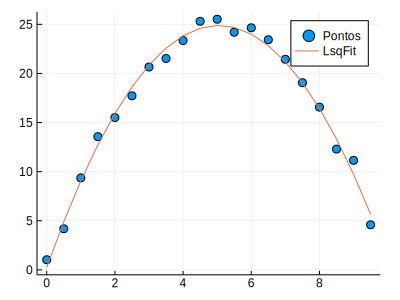

In [99]:
using Plots
gr()

scatter(x_dados , y_dados, label = "Pontos")
plot!(x_dados, modelo_curva_lsqfit(x_dados, k_LF),  size = (400, 300), label = "LsqFit")

### NÃO POLINOMIAL 

Modelos de ajuste de curvas:
<img src="Figuras/funcoes-ajustes-curvas.png" align="center" width="500">

In [100]:
using DataFrames

tabela_dados_senoide = CSV.read("dados_senoide.csv");

atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_senoide


In [101]:
x_dados = float.(tabela_dados_senoide[1])
y_dados = float.(tabela_dados_senoide[2]);

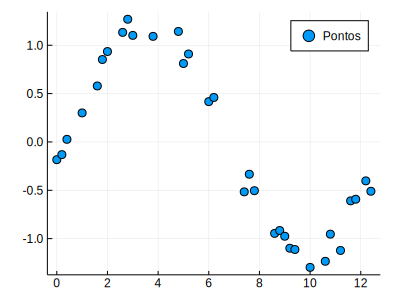

In [102]:
using Plots
gr()

scatter(x_dados , y_dados,  size = (400, 300), label = "Pontos")

De acordo com o gráfico, podemos identificar que os pontos determinam o modelo de uma senóide. A função senóide utilizada como modelo será na forma:

$$ modelo = k_1sin( k_2x + k_3)$$

#### PACOTE LSQFIT

 Sintaxe:
```julia
@. modelo_ajuste_lsqfit(x, k) = k[1]*x^2 + k[1]*x +...+ k[2] 
ajuste_dados = curve_fit(modelo_ajuste, x_dados, y_dados, [k_1,..., k_n])
k = vetor_dados_ajuste.param
```
Sendo: 
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";  
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y";
* **modelo_ajuste**: função matemática que mais se aproxima dos dados;
* **k**: vetor das constantes do modelo;
* **k_1 e k_2**: valores iniciais das constantes do modelo.

In [103]:
using LsqFit

In [104]:
# Vetor "k_LF" determina os coef iniciais do modelo não polinomial
@. modelo_naopoli_lsqfit(x, k_LF) = k_LF[1]*sin( k_LF[2]*x + k_LF[3] )

modelo_naopoli_lsqfit (generic function with 1 method)

In [105]:
# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5, 0.5]

naopoli = LsqFit.curve_fit(modelo_naopoli_lsqfit, float(x_dados), float(y_dados), [0.5, 0.5, 0.5]);

atualizando o vetor "a". Veja os coeficientes do modelo não polinomial


In [106]:
k_LF = naopoli.param

3-element Array{Float64,1}:
  1.1921076214906288 
  0.49428394607557274
 -0.19875404932772162

In [107]:
# testando o modelo de ajuste para x = 0
modelo_naopoli_lsqfit(0, k_LF)

-0.2353793399080858

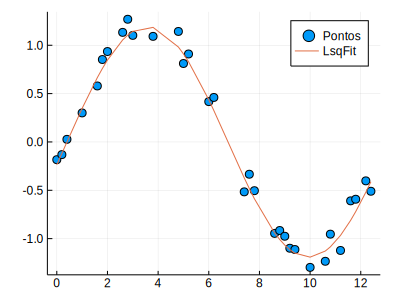

In [108]:
using Plots
gr()

scatter(x_dados , y_dados, label = "Pontos")
plot!(x_dados, modelo_naopoli_lsqfit(x_dados, k_LF),  size = (400, 300), label = "LsqFit")

## BIBLIOGRAFIA

CHAPRA, S. C.; CANALE, R. P. **Métodos Numéricos para a Engenharia**. 5ª ed., São Paulo: McGrawHill. 2008.